<a href="https://colab.research.google.com/github/CaroHalblaub/USAnalyse/blob/main/US_Segmentierung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importieren der Daten von Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ein vortrainiertes Model für YOLOv8 für medizinische Segmentierung
!wget https://github.com/sevdaimany/YOLOv8-Medical-Imaging/raw/master/runs/segment/train/weights/best.pt -O yolov8n-medicalImaging.pt

--2025-07-20 08:54:34--  https://github.com/sevdaimany/YOLOv8-Medical-Imaging/raw/master/runs/segment/train/weights/best.pt
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sevdaimany/YOLOv8-Medical-Imaging/master/runs/segment/train/weights/best.pt [following]
--2025-07-20 08:54:35--  https://raw.githubusercontent.com/sevdaimany/YOLOv8-Medical-Imaging/master/runs/segment/train/weights/best.pt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6771960 (6.5M) [application/octet-stream]
Saving to: ‘yolov8n-medicalImaging.pt’

yolov8n-medicalImag 100%[===================>]   6.46M  --.-KB/s    in 0.

In [ ]:
# Installieren der ultralytics Bibliothek
pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
# Importieren von YOLO
from ultralytics import YOLO

model = YOLO('yolo11n-seg.pt') # load a pretrained model (recommended for training)
#model = YOLO("yolov8n-medicalImaging.pt") # load a pretrained medical imaging model
#model = YOLO("yolo11n-seg.yaml")  # build a new model from YAML

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 43.3M/43.3M [00:00<00:00, 46.8MB/s]


In [ ]:
#Augmentation
strong_aug = {
    "dropout": 0.4, #Dropout rate for regularization in classification tasks, preventing overfitting by randomly omitting units during training.
    "hsv_h": 0, #Adjusts the hue of the image
    "hsv_s": 0, #Alters the saturation of the image
    "hsv_v": 0.5, # Modifies the value (brightness) of the image
    "degrees": 30.0, # 30 Rotates the image randomly within the specified degree range
    "translate": 0.1, #Translates the image horizontally and vertically by a fraction of the image size
    "scale": 0.3, #Scales the image by a gain factor
    "shear": 5, #Shears the image by a specified degree
    "perspective": 0.0001, #Applies a random perspective transformation to the image
    "flipud": 0.5, #Flips the image upside down with the specified probability
    "fliplr": 0.7, # 0.5Flips the image left to right with the specified probability
    "bgr": 0, #Flips the image channels from RGB to BGR
    "mosaic": 0, #Combines four training images into one, simulating different scene compositions and object interactions. Highly effective for complex scene understanding.
    "mixup": 0, #Blends two images and their labels, creating a composite image. Enhances the model's ability to generalize by introducing label noise and visual variability.
    "cutmix": 0, #Combines portions of two images, creating a partial blend while maintaining distinct regions. Enhances model robustness by creating occlusion scenarios.
    "erasing": 0, #Classification only. Randomly erases regions of the image during training to encourage the model to focus on less obvious features.
}

no_aug = {
    "dropout": 0,
    "hsv_h": 0,
    "hsv_s": 0,
    "hsv_v": 0,
    "degrees": 0.0,
    "translate": 0.0,
    "scale": 0.0,
    "shear": 0,
    "perspective": 0,
    "flipud": 0.0,
    "fliplr": 0.0,
    "bgr": 0,
    "mosaic": 0,
    "mixup": 0,
    "cutmix": 0,
    "erasing": 0,
}

weak_aug = {
    "dropout": 0.2,
    "hsv_h": 0,
    "hsv_s": 0,
    "hsv_v": 0.1,
    "degrees": 10.0,
    "translate": 0.05,
    "scale": 0.3,
    "shear": 0,
    "perspective": 0,
    "flipud": 0,
    "fliplr": 0.5,
    "bgr": 0,
    "mosaic": 0,
    "mixup": 0,
    "cutmix": 0,
    "erasing": 0,
}

In [ ]:
# Einstellung von Trainingsparametern
model.train(
    data='/content/drive/MyDrive/dataset/data.yaml',
    epochs=200,
    imgsz=640,
    #amp=False,
    #lr0=0.0005,
    overlap_mask=False,
    mask_ratio=1,
    batch=32,
    patience=200,
    #freeze=23,
    **strong_aug
    )

Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0, data=/content/drive/MyDrive/dataset/data.yaml, degrees=30.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.4, dynamic=False, embed=None, epochs=200, erasing=0, exist_ok=False, fliplr=0.7, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0, hsv_s=0, hsv_v=0.5, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=1, max_det=300, mixup=0, mode=train, model=yolov8n-medicalImaging.pt, momentum=0.937, mosaic=0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=False, patience=200, perspective=0.0001, plots=True, pose

100%|██████████| 755k/755k [00:00<00:00, 77.0MB/s]

Overriding model.yaml nc=3 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.

 22        [15, 18, 21]  1   1004470  ultralytics.nn.modules.head.Segment          [2, 32, 64, [64, 128, 256]]   
YOLOv8n-seg summary: 151 layers, 3,264,006 parameters, 3,263,990 gradients, 12.1 GFLOPs

Transferred 411/417 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 329MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 1.6±2.6 ms, read: 0.1±0.0 MB/s, size: 91.4 KB)


train: Scanning /content/drive/MyDrive/dataset/labels/train.cache... 210 images, 0 backgrounds, 0 corrupt: 100%|██████████| 210/210 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.6±0.1 ms, read: 0.1±0.0 MB/s, size: 92.2 KB)


val: Scanning /content/drive/MyDrive/dataset/labels/val.cache... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<?, ?it/s]


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/200      4.84G      2.257      4.735      4.368      3.019         54        640: 100%|██████████| 7/7 [00:09<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:57<00:00, 57.77s/it]

                   all         45        135      0.118     0.0375     0.0867     0.0224      0.135     0.0437      0.112     0.0311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/200      5.64G      1.835      3.644      3.448      2.415         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.11s/it]

                   all         45        135      0.435      0.599      0.427      0.199       0.44      0.602      0.428       0.19



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/200      5.66G      1.623      2.985      2.601      2.153         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all         45        135      0.432      0.654      0.477      0.193      0.432      0.655      0.477      0.227



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/200      5.68G      1.526      2.802      2.272      2.056         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.53s/it]

                   all         45        135      0.437      0.745      0.485       0.23      0.452      0.758      0.508      0.265



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/200      5.68G      1.432       2.52      2.066      1.922         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]

                   all         45        135      0.437      0.812      0.519      0.282      0.437      0.812      0.519      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/200      5.68G      1.386      2.423      1.924      1.834         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.48s/it]

                   all         45        135      0.397      0.819      0.417      0.221       0.41      0.836      0.439      0.215



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/200      5.68G      1.369      2.366      1.771      1.796         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]

                   all         45        135      0.417      0.785      0.447      0.241      0.424      0.795      0.452      0.227



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/200      5.68G      1.354      2.186      1.662      1.793         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         45        135      0.444      0.902       0.46      0.251      0.444      0.892      0.462      0.249



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/200      5.69G      1.334      2.144       1.63       1.76         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.56s/it]

                   all         45        135       0.39      0.865      0.434      0.256      0.462      0.827      0.513      0.257



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/200      5.69G      1.317      2.114      1.568      1.727         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]

                   all         45        135      0.456      0.828      0.464      0.261      0.461      0.855       0.47      0.246



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/200      5.69G      1.292      1.992      1.532      1.675         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.47s/it]

                   all         45        135       0.44      0.898      0.459      0.264      0.458      0.922      0.478      0.262



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/200      5.69G      1.286      1.947      1.487      1.691         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

                   all         45        135      0.421      0.852      0.465      0.273       0.45      0.825      0.523      0.257



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/200      5.69G      1.291      1.891       1.47      1.693         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]

                   all         45        135      0.451      0.834      0.457      0.263      0.465      0.855      0.488      0.263



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/200      5.71G       1.27      1.855      1.406      1.664         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

                   all         45        135      0.401      0.832      0.507      0.317      0.469      0.722      0.533      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/200      5.73G      1.259      1.845      1.357       1.63         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]

                   all         45        135      0.496      0.945      0.598      0.384      0.496      0.945      0.598      0.367



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/200      5.75G      1.213      1.793      1.354      1.592         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.77s/it]

                   all         45        135      0.451      0.898      0.506      0.306      0.455      0.904      0.508      0.294



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/200      5.75G      1.207      1.779       1.29      1.609         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

                   all         45        135      0.472      0.927      0.539      0.297      0.477      0.936      0.575      0.325



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/200      5.75G      1.209      1.782      1.306      1.601         54        640: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]

                   all         45        135      0.415      0.828      0.462      0.273      0.441       0.77      0.508      0.276



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/200      5.75G      1.201      1.744      1.252      1.618         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]

                   all         45        135      0.477      0.942      0.508      0.332       0.48      0.951      0.513      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/200      5.75G      1.229      1.728      1.262      1.604         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         45        135      0.483      0.922      0.494      0.296      0.483      0.922      0.494      0.291



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/200      5.75G       1.17      1.719      1.236      1.559         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]

                   all         45        135       0.48      0.936      0.508      0.312      0.484      0.945      0.511      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/200      5.75G      1.164      1.653      1.186      1.559         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all         45        135      0.487       0.89      0.502      0.305      0.487      0.887      0.496      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/200      5.75G      1.202      1.631      1.179      1.584         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]

                   all         45        135      0.437       0.92       0.48      0.279      0.435      0.909      0.479      0.277



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/200      5.75G      1.152       1.58      1.124       1.55         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]

                   all         45        135      0.468      0.945      0.503      0.304      0.475      0.964      0.515      0.317



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/200      5.75G      1.134      1.584      1.134      1.533         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]

                   all         45        135       0.47      0.945       0.54      0.307       0.47      0.927      0.543      0.295



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/200      5.75G      1.164      1.598      1.133      1.551         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.50s/it]

                   all         45        135       0.48      0.936      0.547      0.336      0.471      0.918      0.537      0.332



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/200      5.75G      1.146      1.636      1.115      1.534         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all         45        135      0.476      0.966      0.511      0.281      0.476      0.966      0.511      0.294



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/200      5.75G      1.105      1.553      1.077      1.466         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.54s/it]

                   all         45        135      0.417        0.9      0.448      0.273      0.424      0.913      0.461      0.276



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/200      5.75G      1.119      1.551      1.064      1.503         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]

                   all         45        135      0.456      0.944      0.507      0.283      0.456      0.944      0.507      0.288



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/200      5.77G      1.156      1.633      1.074      1.533         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         45        135      0.456      0.833      0.536      0.299       0.47      0.841      0.543      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/200      5.79G      1.155      1.591      1.069      1.515         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all         45        135      0.379      0.841      0.423      0.259      0.385      0.846       0.43      0.268



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/200      5.79G       1.14       1.61      1.077      1.502         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         45        135       0.46      0.905      0.552      0.331      0.462      0.885      0.556      0.334



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/200      5.79G      1.109      1.534      1.047      1.466         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.42s/it]

                   all         45        135      0.399      0.852      0.493      0.309      0.403      0.856      0.498      0.326



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/200      5.79G      1.089      1.477     0.9857      1.448         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]

                   all         45        135      0.487      0.936      0.502      0.299      0.487      0.936      0.502       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/200      5.79G      1.079      1.505     0.9572      1.444         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all         45        135      0.438      0.898      0.604      0.353      0.438      0.898      0.604      0.357



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/200      5.79G      1.102      1.505     0.9903      1.462         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all         45        135      0.466      0.927      0.507      0.329       0.46      0.909      0.503      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/200      5.79G      1.089      1.512     0.9311      1.442         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         45        135      0.457      0.939      0.538      0.335      0.453       0.93      0.533      0.328



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/200      5.79G       1.05      1.473     0.9151      1.408         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.66s/it]

                   all         45        135      0.406      0.892      0.447      0.273      0.407      0.889      0.449      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/200      5.79G      1.069      1.456     0.8903      1.426         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]

                   all         45        135      0.425      0.904      0.506      0.308      0.427      0.871       0.51      0.317



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/200      5.79G      1.088      1.425     0.9156      1.432         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.03s/it]

                   all         45        135      0.518      0.899      0.606      0.352       0.51      0.887      0.581      0.363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/200      5.79G      1.046      1.473     0.8586      1.389         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

                   all         45        135      0.489      0.913      0.636      0.416      0.506      0.892      0.637      0.407



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/200      5.79G      1.066      1.473     0.8584       1.41         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         45        135      0.429      0.862      0.435      0.286      0.429      0.862      0.435      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/200      5.79G      1.055      1.429     0.8558      1.408         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.85s/it]

                   all         45        135      0.428      0.888      0.434      0.277      0.436        0.9      0.438      0.285



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/200      5.79G      1.063      1.451     0.8422      1.411         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.00it/s]

                   all         45        135       0.44      0.923      0.494       0.28      0.452      0.921      0.527      0.318



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/200      5.79G      1.028      1.454     0.8312      1.379         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.39s/it]

                   all         45        135      0.436        0.9      0.463      0.277      0.436        0.9       0.46      0.288



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/200      5.79G      1.016      1.433     0.8716      1.374         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all         45        135      0.347      0.754      0.405      0.263      0.349      0.754      0.398      0.261



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/200      5.79G      1.053      1.428     0.8566      1.393         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

                   all         45        135      0.414      0.905      0.447      0.275      0.411      0.831      0.475       0.27



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/200      5.79G      1.051      1.433     0.8285      1.396         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all         45        135      0.414       0.88      0.413      0.256      0.414      0.877      0.413      0.264



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/200      5.79G      1.044      1.476     0.8054      1.358         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         45        135      0.465      0.926      0.488      0.316      0.454      0.917      0.494       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/200      5.79G      1.042      1.411     0.7547       1.35         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.73s/it]

                   all         45        135      0.495      0.917      0.595      0.388      0.503      0.886      0.607      0.398



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/200      5.79G      1.019      1.366     0.7446       1.36         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         45        135      0.458      0.884      0.464      0.291      0.452      0.866       0.46      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/200      5.79G      1.015      1.377     0.7497      1.379         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

                   all         45        135      0.449      0.818      0.471      0.279      0.455      0.825      0.472      0.266



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/200      5.79G      1.005      1.387     0.7198      1.363         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all         45        135      0.447       0.86       0.48      0.322      0.444      0.851       0.47      0.318



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/200      5.79G      1.029      1.402      0.722      1.366         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

                   all         45        135      0.413      0.826      0.422      0.263      0.413      0.826      0.422      0.274



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/200      5.79G      0.997      1.372      0.742      1.346         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.87s/it]

                   all         45        135       0.41      0.846      0.435      0.266      0.418      0.857      0.445       0.27



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/200      5.79G     0.9808      1.359      0.665      1.334         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all         45        135      0.402      0.761      0.428      0.278      0.402      0.761      0.421      0.271



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/200      5.79G     0.9977      1.316     0.6816      1.331         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

                   all         45        135       0.42      0.795      0.422      0.251      0.416      0.786      0.417      0.248



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/200       5.8G      1.014      1.328     0.7087      1.353         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all         45        135      0.723      0.704      0.741      0.478      0.725      0.696      0.728      0.471



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/200       5.8G      1.052      1.386     0.7515      1.382         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]

                   all         45        135      0.434      0.841      0.438      0.276      0.434      0.841      0.438      0.278



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/200       5.8G     0.9973      1.369     0.6703       1.34         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.50s/it]

                   all         45        135      0.619      0.756      0.727      0.472      0.611      0.747      0.714      0.445



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/200       5.8G     0.9746      1.343     0.6683      1.309         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all         45        135      0.422      0.818      0.429      0.273      0.422      0.818      0.429      0.272



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/200       5.8G     0.9797      1.296     0.6944      1.347         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]

                   all         45        135      0.495        0.6      0.557       0.38      0.426      0.729      0.548      0.367



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/200       5.8G      0.966      1.328     0.6824      1.324         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.03s/it]

                   all         45        135      0.387      0.807      0.407      0.258      0.387      0.804      0.402      0.256



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/200       5.8G      0.971      1.344     0.6698      1.312         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]

                   all         45        135      0.642      0.726      0.728      0.457      0.649      0.732      0.731      0.476



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/200       5.8G     0.9751      1.328     0.6653      1.304         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.46s/it]

                   all         45        135      0.434      0.859      0.555      0.327      0.429       0.85      0.545      0.352



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/200       5.8G     0.9968      1.344     0.6947      1.328         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]

                   all         45        135      0.344      0.721      0.415      0.254      0.373      0.754      0.441      0.265



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/200       5.8G     0.9859      1.329     0.6839      1.328         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.54s/it]

                   all         45        135      0.432      0.859      0.496      0.328      0.432      0.859      0.501      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/200       5.8G     0.9685       1.32     0.6301      1.301         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all         45        135      0.351      0.704      0.367      0.233      0.351      0.704      0.369      0.232



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/200       5.8G     0.9683      1.285     0.6237      1.324         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.00it/s]

                   all         45        135      0.345      0.748      0.364      0.216      0.356      0.753      0.388      0.231



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/200       5.8G     0.9478      1.273     0.6146      1.304         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.15s/it]

                   all         45        135      0.456      0.801      0.472      0.289      0.439       0.86      0.472      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/200       5.8G     0.9546       1.28     0.6145      1.294         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all         45        135      0.548      0.793      0.684      0.462      0.543      0.784      0.679       0.45



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/200       5.8G     0.9666      1.305      0.603      1.299         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.66s/it]

                   all         45        135      0.388      0.764      0.395      0.235      0.388      0.764      0.398      0.246



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/200       5.8G     0.9729      1.304     0.6212      1.303         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

                   all         45        135        0.4      0.777      0.409       0.25      0.403       0.78      0.409      0.258



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/200       5.8G     0.9572      1.299     0.5973      1.294         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]

                   all         45        135      0.577      0.771      0.644      0.419      0.577      0.771      0.646      0.418



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/200       5.8G     0.9318      1.258     0.5873      1.282         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.15s/it]

                   all         45        135      0.493      0.912      0.558       0.36      0.493      0.912      0.558       0.37



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/200       5.8G     0.9563      1.274     0.5983      1.283         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]

                   all         45        135      0.486      0.842      0.621      0.404      0.486      0.842      0.621      0.419



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/200       5.8G     0.9186      1.273     0.5922      1.267         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.78s/it]

                   all         45        135      0.421      0.799       0.46      0.286      0.413      0.779      0.455      0.291



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/200       5.8G     0.9072      1.251     0.5707      1.252         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

                   all         45        135      0.425      0.785      0.447      0.297      0.421      0.776      0.442      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/200       5.8G     0.9277      1.254     0.5844      1.261         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]

                   all         45        135      0.424      0.756       0.44      0.265      0.415      0.738      0.431      0.272



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/200       5.8G     0.9104       1.25     0.5778      1.248         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]

                   all         45        135      0.335      0.596       0.36      0.229      0.351      0.618      0.364      0.227



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/200       5.8G     0.8955      1.215     0.5652      1.231         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

                   all         45        135      0.436      0.815      0.523      0.329      0.436      0.815      0.525      0.332



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/200       5.8G      0.935      1.232     0.5534       1.27         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.62s/it]

                   all         45        135      0.493      0.882      0.575      0.369      0.493      0.882      0.575      0.393



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/200       5.8G     0.9458      1.264     0.5722      1.268         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]

                   all         45        135       0.44      0.783      0.458      0.296      0.436      0.774      0.457      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/200       5.8G     0.9401      1.199     0.5552      1.273         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.41s/it]

                   all         45        135      0.507      0.826      0.647      0.397      0.502      0.817      0.645       0.42



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/200       5.8G     0.9184      1.214     0.5616      1.261         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]

                   all         45        135      0.401      0.773      0.433      0.265      0.401      0.773      0.437      0.277



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/200       5.8G     0.9511      1.264     0.5498      1.281         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         45        135      0.443      0.794      0.469      0.298      0.443      0.794      0.471      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/200       5.8G     0.8915      1.234     0.5521      1.261         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all         45        135      0.459      0.826      0.461      0.292      0.459      0.826      0.461      0.306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/200       5.8G     0.8791      1.202     0.5199      1.235         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

                   all         45        135       0.53      0.666      0.547      0.363       0.53      0.666      0.547       0.36



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/200       5.8G     0.8824      1.196      0.539       1.24         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.83s/it]

                   all         45        135      0.413      0.719      0.426      0.275      0.413      0.719      0.426      0.276



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/200       5.8G     0.8729      1.233     0.5282      1.211         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         45        135      0.538      0.773      0.657      0.447      0.532      0.764      0.648      0.452



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/200       5.8G     0.8948      1.218     0.5565       1.23         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all         45        135      0.403      0.687      0.412      0.261        0.4      0.678      0.406       0.26



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/200       5.8G     0.8814      1.174     0.5884      1.223         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

                   all         45        135      0.492      0.826       0.62      0.411      0.486      0.811      0.615      0.417



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/200       5.8G     0.8814      1.197      0.575      1.235         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

                   all         45        135      0.489      0.756      0.547      0.373      0.489      0.756      0.547      0.368



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/200       5.8G     0.8757      1.188     0.5292      1.208         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.70s/it]

                   all         45        135      0.403      0.951      0.432      0.285      0.403      0.951      0.432       0.28



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/200       5.8G     0.8672      1.184     0.5141      1.218         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all         45        135       0.47      0.821      0.566       0.38      0.463      0.812      0.557      0.383



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/200       5.8G     0.8863        1.2     0.5032       1.23         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.50s/it]

                   all         45        135      0.429      0.811      0.439      0.288      0.425      0.802      0.433      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/200       5.8G     0.8833      1.195     0.5133      1.224         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all         45        135      0.417       0.77       0.43      0.269      0.413      0.761      0.423      0.273



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/200       5.8G     0.8745        1.2     0.5172       1.22         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

                   all         45        135      0.431      0.799       0.43      0.275      0.427       0.79      0.425      0.266



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/200       5.8G     0.8761      1.191     0.5078       1.21         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.41s/it]

                   all         45        135       0.58      0.591      0.615      0.409      0.591      0.597      0.617      0.412



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/200       5.8G     0.8648      1.171     0.4762       1.19         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.03s/it]

                   all         45        135      0.418      0.714      0.437      0.292      0.423       0.72      0.438      0.279



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/200       5.8G     0.8732      1.176      0.485      1.205         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.65s/it]

                   all         45        135      0.474      0.815      0.533      0.356       0.47      0.806      0.529      0.354



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/200       5.8G     0.8651      1.158     0.4906      1.207         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all         45        135      0.473      0.756      0.586      0.389      0.468      0.747      0.579      0.402



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/200       5.8G     0.8407      1.142      0.495      1.189         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all         45        135      0.396      0.613      0.387      0.247      0.398       0.61      0.383      0.246



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/200       5.8G     0.8546      1.145     0.4823      1.197         54        640: 100%|██████████| 7/7 [00:04<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.15s/it]

                   all         45        135      0.531       0.73      0.648      0.432      0.531       0.73      0.648      0.439



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/200       5.8G     0.8527      1.137     0.4915      1.185         54        640: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.00it/s]

                   all         45        135      0.732      0.722      0.747      0.509      0.732      0.722      0.747      0.512



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/200       5.8G     0.8966      1.142     0.5233      1.223         96        640:  29%|██▊       | 2/7 [00:01<00:02,  1.77it/s]

In [ ]:
#Compute IoU

import os
import cv2
import numpy as np
from tqdm import tqdm

model = YOLO("/content/drive/MyDrive/US_Projekt/nopretrained_weak_aug/train/weights/best.pt")  # Adjust path of the model used
# Paths to test images and labels
img_dir = "/content/drive/MyDrive/dataset/test/images/test"
label_dir = "/content/drive/MyDrive/dataset/test/labels/test"

# Helper: Convert YOLO polygon annotation to a binary mask
def polygon_to_mask(img_shape, polygon):
    mask = np.zeros(img_shape, dtype=np.uint8)
    pts = np.array(polygon, np.int32).reshape((-1, 2))
    cv2.fillPoly(mask, [pts], 1)
    return mask

# Store IoUs
ious = []

# Iterate over all test images
for img_file in tqdm(os.listdir(img_dir)):
    if not img_file.endswith((".jpg", ".png", ".jpeg")):
        continue

    # Load image
    img_path = os.path.join(img_dir, img_file)
    image = cv2.imread(img_path)
    h, w = image.shape[:2]

    # Predict with model (resizes to 512 by default)
    results = model.predict(img_path, conf=0.25, save=False)[0]
    pred_masks = results.masks.data.cpu().numpy() if results.masks else []

    # Load ground truth polygons
    label_file = img_file.rsplit(".", 1)[0] + ".txt"
    label_path = os.path.join(label_dir, label_file)
    if not os.path.exists(label_path):
        continue

    with open(label_path, "r") as f:
        lines = f.readlines()

    for line in lines:
        parts = line.strip().split()
        if len(parts) <= 5:
            continue  # skip if no polygon

        polygon = list(map(float, parts[5:]))
        polygon[::2] = [x * w for x in polygon[::2]]  # scale x
        polygon[1::2] = [y * h for y in polygon[1::2]]  # scale y

        gt_mask = polygon_to_mask((h, w), polygon)

        # Match with best predicted mask (resized to original shape)
        best_iou = 0
        for pm in pred_masks:
            pred_mask = (pm > 0.5).astype(np.uint8)
            pred_mask_resized = cv2.resize(pred_mask, (w, h), interpolation=cv2.INTER_NEAREST)

            intersection = np.logical_and(gt_mask, pred_mask_resized).sum()
            union = np.logical_or(gt_mask, pred_mask_resized).sum()
            if union > 0:
                iou = intersection / union
                best_iou = max(best_iou, iou)

        ious.append(best_iou)

# Compute mean IoU
if ious:
    mean_iou = np.mean(ious)
    print(f"\n✅ Mean IoU over {len(ious)} masks: {mean_iou:.4f}")
else:
    print("⚠️ No IoUs could be calculated — check label/prediction format.")


  0%|          | 0/46 [00:00<?, ?it/s]


image 1/1 /content/drive/MyDrive/dataset/test/images/test/w_person3_video0_frame_7.jpg: 640x640 3 M. geniohyoideuss, 9.9ms
Speed: 2.9ms preprocess, 9.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 1/46 [00:00<00:08,  5.18it/s]


image 1/1 /content/drive/MyDrive/dataset/test/images/test/w_person3_video0_frame_8.jpg: 640x640 1 M. digastricus, 4 M. geniohyoideuss, 11.7ms
Speed: 4.9ms preprocess, 11.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/dataset/test/images/test/w_person3_video0_frame_1.jpg: 640x640 2 M. digastricuss, 4 M. geniohyoideuss, 11.1ms
Speed: 2.9ms preprocess, 11.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 3/46 [00:00<00:04,  9.71it/s]


image 1/1 /content/drive/MyDrive/dataset/test/images/test/w_person3_video0_frame_2.jpg: 640x640 1 M. digastricus, 3 M. geniohyoideuss, 10.6ms
Speed: 3.0ms preprocess, 10.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/dataset/test/images/test/w_person3_video0_frame_5.jpg: 640x640 1 M. digastricus, 2 M. geniohyoideuss, 10.7ms
Speed: 3.0ms preprocess, 10.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 5/46 [00:00<00:03, 12.69it/s]


image 1/1 /content/drive/MyDrive/dataset/test/images/test/w_person3_video0_frame_9.jpg: 640x640 3 M. digastricuss, 3 M. geniohyoideuss, 12.7ms
Speed: 3.4ms preprocess, 12.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/dataset/test/images/test/w_person3_video0_frame_4.jpg: 640x640 2 M. digastricuss, 3 M. geniohyoideuss, 11.3ms
Speed: 3.0ms preprocess, 11.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▌        | 7/46 [00:00<00:03, 12.90it/s]


image 1/1 /content/drive/MyDrive/dataset/test/images/test/w_person3_video0_frame_0.jpg: 640x640 1 M. digastricus, 3 M. geniohyoideuss, 11.0ms
Speed: 3.0ms preprocess, 11.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/dataset/test/images/test/w_person3_video0_frame_3.jpg: 640x640 1 M. digastricus, 5 M. geniohyoideuss, 12.3ms
Speed: 2.9ms preprocess, 12.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


 20%|█▉        | 9/46 [00:00<00:02, 13.61it/s]


image 1/1 /content/drive/MyDrive/dataset/test/images/test/w_person3_video0_frame_6.jpg: 640x640 2 M. digastricuss, 3 M. geniohyoideuss, 10.7ms
Speed: 2.9ms preprocess, 10.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/dataset/test/images/test/w_person3_video1_frame_4.jpg: 640x640 2 M. geniohyoideuss, 11.2ms
Speed: 3.0ms preprocess, 11.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 11/46 [00:00<00:02, 14.80it/s]


image 1/1 /content/drive/MyDrive/dataset/test/images/test/w_person3_video1_frame_2.jpg: 640x640 1 M. digastricus, 5 M. geniohyoideuss, 10.9ms
Speed: 2.9ms preprocess, 10.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/dataset/test/images/test/w_person3_video1_frame_1.jpg: 640x640 1 M. digastricus, 3 M. geniohyoideuss, 12.3ms
Speed: 3.0ms preprocess, 12.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 13/46 [00:00<00:02, 14.98it/s]


image 1/1 /content/drive/MyDrive/dataset/test/images/test/w_person3_video1_frame_0.jpg: 640x640 2 M. geniohyoideuss, 10.8ms
Speed: 3.1ms preprocess, 10.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/dataset/test/images/test/w_person3_video1_frame_3.jpg: 640x640 1 M. digastricus, 1 M. geniohyoideus, 11.5ms
Speed: 3.3ms preprocess, 11.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/dataset/test/images/test/person1_video0_frame_07.jpg: 640x640 1 M. digastricus, 1 M. geniohyoideus, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▍      | 16/46 [00:01<00:01, 17.30it/s]


image 1/1 /content/drive/MyDrive/dataset/test/images/test/person1_video0_frame_08.jpg: 640x640 1 M. digastricus, 1 M. geniohyoideus, 10.7ms
Speed: 1.7ms preprocess, 10.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/dataset/test/images/test/person1_video0_frame_03.jpg: 640x640 2 M. digastricuss, 1 M. geniohyoideus, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/dataset/test/images/test/person1_video0_frame_05.jpg: 640x640 2 M. digastricuss, 1 M. geniohyoideus, 12.3ms
Speed: 1.7ms preprocess, 12.3ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


 41%|████▏     | 19/46 [00:01<00:01, 19.09it/s]


image 1/1 /content/drive/MyDrive/dataset/test/images/test/person1_video0_frame_04.jpg: 640x640 2 M. digastricuss, 1 M. geniohyoideus, 12.1ms
Speed: 2.5ms preprocess, 12.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/dataset/test/images/test/person1_video0_frame_02.jpg: 640x640 2 M. digastricuss, 1 M. geniohyoideus, 12.9ms
Speed: 2.2ms preprocess, 12.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 21/46 [00:01<00:01, 18.99it/s]


image 1/1 /content/drive/MyDrive/dataset/test/images/test/person1_video0_frame_00.jpg: 640x640 1 M. digastricus, 2 M. geniohyoideuss, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/dataset/test/images/test/person1_video0_frame_01.jpg: 640x640 2 M. digastricuss, 1 M. geniohyoideus, 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


 50%|█████     | 23/46 [00:01<00:01, 19.23it/s]


image 1/1 /content/drive/MyDrive/dataset/test/images/test/person1_video0_frame_06.jpg: 640x640 2 M. digastricuss, 1 M. geniohyoideus, 14.8ms
Speed: 1.9ms preprocess, 14.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/dataset/test/images/test/person1_video0_frame_09.jpg: 640x640 2 M. digastricuss, 1 M. geniohyoideus, 11.0ms
Speed: 2.2ms preprocess, 11.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/dataset/test/images/test/person1_video1_frame_06.jpg: 640x640 2 M. digastricuss, 1 M. geniohyoideus, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 26/46 [00:01<00:00, 20.08it/s]


image 1/1 /content/drive/MyDrive/dataset/test/images/test/person1_video1_frame_03.jpg: 640x640 2 M. digastricuss, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/dataset/test/images/test/person1_video1_frame_01.jpg: 640x640 3 M. digastricuss, 11.1ms
Speed: 1.7ms preprocess, 11.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/dataset/test/images/test/person1_video1_frame_05.jpg: 640x640 3 M. digastricuss, 10.6ms
Speed: 1.7ms preprocess, 10.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 29/46 [00:01<00:00, 20.77it/s]


image 1/1 /content/drive/MyDrive/dataset/test/images/test/person1_video1_frame_04.jpg: 640x640 3 M. digastricuss, 10.5ms
Speed: 1.9ms preprocess, 10.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/dataset/test/images/test/person1_video1_frame_09.jpg: 640x640 3 M. digastricuss, 10.7ms
Speed: 2.1ms preprocess, 10.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/dataset/test/images/test/person1_video1_frame_08.jpg: 640x640 3 M. digastricuss, 18.6ms
Speed: 1.8ms preprocess, 18.6ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 640)


 70%|██████▉   | 32/46 [00:01<00:00, 21.02it/s]


image 1/1 /content/drive/MyDrive/dataset/test/images/test/person1_video1_frame_00.jpg: 640x640 3 M. digastricuss, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/dataset/test/images/test/person1_video1_frame_07.jpg: 640x640 4 M. digastricuss, 1 M. geniohyoideus, 11.8ms
Speed: 2.2ms preprocess, 11.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/dataset/test/images/test/person1_video1_frame_02.jpg: 640x640 2 M. digastricuss, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 35/46 [00:01<00:00, 21.46it/s]


image 1/1 /content/drive/MyDrive/dataset/test/images/test/person3_video0_frame_0.jpg: 640x640 2 M. digastricuss, 1 M. geniohyoideus, 11.6ms
Speed: 2.1ms preprocess, 11.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/dataset/test/images/test/person3_video0_frame_5.jpg: 640x640 3 M. digastricuss, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/dataset/test/images/test/person3_video0_frame_2.jpg: 640x640 2 M. digastricuss, 1 M. geniohyoideus, 10.7ms
Speed: 1.7ms preprocess, 10.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 38/46 [00:02<00:00, 22.09it/s]


image 1/1 /content/drive/MyDrive/dataset/test/images/test/person3_video0_frame_3.jpg: 640x640 4 M. digastricuss, 1 M. geniohyoideus, 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/dataset/test/images/test/person3_video0_frame_4.jpg: 640x640 3 M. digastricuss, 1 M. geniohyoideus, 22.9ms
Speed: 2.4ms preprocess, 22.9ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/dataset/test/images/test/person3_video0_frame_8.jpg: 640x640 2 M. digastricuss, 1 M. geniohyoideus, 17.2ms
Speed: 1.8ms preprocess, 17.2ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 41/46 [00:02<00:00, 20.24it/s]


image 1/1 /content/drive/MyDrive/dataset/test/images/test/person3_video0_frame_6.jpg: 640x640 3 M. digastricuss, 2 M. geniohyoideuss, 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/dataset/test/images/test/person3_video0_frame_9.jpg: 640x640 2 M. digastricuss, 1 M. geniohyoideus, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/dataset/test/images/test/person3_video0_frame_7.jpg: 640x640 2 M. digastricuss, 11.1ms
Speed: 2.3ms preprocess, 11.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 44/46 [00:02<00:00, 20.77it/s]


image 1/1 /content/drive/MyDrive/dataset/test/images/test/person3_video0_frame_1.jpg: 640x640 2 M. digastricuss, 1 M. geniohyoideus, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


100%|██████████| 46/46 [00:02<00:00, 18.56it/s]


✅ Mean IoU over 135 masks: 0.6219


In [ ]:
!cp /content/runs/segment/train5/weights/best.pt /content/drive/MyDrive/US_Projekt/pretrained_strong_aug_freeze.pt #Save Model/ Edit always the name of the model
!cp -r /content/runs/segment/train5 /content/drive/MyDrive/US_Projekt/pretrainedv11_strong_aug


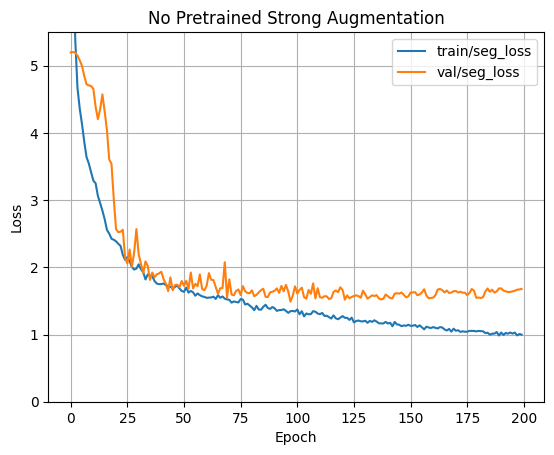

In [ ]:
# Plotten der train/seg_loss und val/seg_loss werten
import pandas as pd
import matplotlib.pyplot as plt

# Plot 1
# Pfad der Datei
path = "/content/drive/MyDrive/US_Projekt/nopretrained_strong_aug/train/results.csv"
path_run = "/content/runs/segment/train/results.csv"
df = pd.read_csv(path)
# Definieren der x-/y-Achse
df = df[["train/seg_loss", "val/seg_loss"]]
df.plot(ylim=(0, 5.5), grid=True)
plt.xlabel("Epoch")
plt.ylabel("Loss")
# Titel des Plots
plt.title("No Pretrained Strong Augmentation")
# Speichern des Plots
plt.savefig('nopretrained_strong_aug.png')


#PLot 2
#path = "/content/drive/MyDrive/US_Projekt/pretrainedv11_weak_aug/results.csv"
#path_run = "/content/runs/segment/train222222222222222/results.csv"
#df = pd.read_csv(path)
#df = df[["train/seg_loss", "val/seg_loss"]]
#df.plot(ylim=(0, 5))

In [ ]:
# Metriken mit dem Testdatensatz  berechnen
!yolo task=segment mode=val model=/content/drive/MyDrive/US_Projekt/pretrained_med_weak_aug/train/weights/best.pt data=/content/drive/MyDrive/dataset/data_test.yaml split=test


#!yolo task=segment mode=val model=/content/drive/MyDrive/US Projekt/pretrainedv11_strong_aug.pt data=/content/drive/MyDrive/dataset/data_test.yaml split=test #Metrics mit Test / Auf model path achten


Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,454 parameters, 0 gradients, 12.0 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 22.6±11.1 MB/s, size: 67.8 KB)
val: Scanning /content/drive/MyDrive/dataset/test/labels/test.cache... 45 images, 0 backgrounds, 0 corrupt: 100% 45/45 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.07s/it]
                   all         45        135      0.405      0.666       0.47      0.198      0.427      0.695      0.477      0.211
        M. digastricus         45         70      0.361      0.486      0.397      0.132      0.404      0.543      0.419      0.144
      M. geniohyoideus         45         65      0.449      0.846      0.543      0.263       0.45      0.846      0.535      0.277
Speed: 0.3ms preprocess, 24.4ms inference, 0.0

In [ ]:
!cp -r /content/runs/segment/val6 /content/drive/MyDrive/US_Projekt/pretrained_strong_aug #Metriken speichern, immer auf Path achten

In [ ]:
#Model auf Bilder laufen lassen
!yolo predict model=/content/drive/MyDrive/US_Projekt/Nopretrainedv11_no_aug/train/weights/best.pt source=/content/drive/MyDrive/US_Projekt/frames line_width=1 conf=0.1 #Path achten

Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-seg summary (fused): 113 layers, 2,834,958 parameters, 0 gradients, 10.2 GFLOPs

image 1/20 /content/drive/MyDrive/US_Projekt/frames/frame_00.jpg: 640x640 3 M. digastricuss, 1 M. geniohyoideus, 19.4ms
image 2/20 /content/drive/MyDrive/US_Projekt/frames/frame_01.jpg: 640x640 3 M. digastricuss, 1 M. geniohyoideus, 13.2ms
image 3/20 /content/drive/MyDrive/US_Projekt/frames/frame_02.jpg: 640x640 3 M. digastricuss, 1 M. geniohyoideus, 12.8ms
image 4/20 /content/drive/MyDrive/US_Projekt/frames/frame_03.jpg: 640x640 4 M. digastricuss, 1 M. geniohyoideus, 11.9ms
image 5/20 /content/drive/MyDrive/US_Projekt/frames/frame_04.jpg: 640x640 4 M. digastricuss, 2 M. geniohyoideuss, 13.0ms
image 6/20 /content/drive/MyDrive/US_Projekt/frames/frame_05.jpg: 640x640 4 M. digastricuss, 2 M. geniohyoideuss, 12.3ms
image 7/20 /content/drive/MyDrive/US_Projekt/frames/frame_06.jpg: 640x640 4 M. digastricuss, 1 M. geniohyo

In [ ]:
#Model auf video laufen lassen
#from ultralytics import YOLO
#!yolo predict model=/content/drive/MyDrive/US_Projekt/nopretrained_strong_aug/train/weights/best.pt source=/content/drive/MyDrive/US_Projekt/frames/Video_probe line_width=1 conf=0.1 #Path achten
#!ffmpeg -i runs/segment/predict2/0.avi -vcodec libx264 -crf 23 -preset medium output.mp4
!cp output.mp4 /content/drive/MyDrive/US_Projekt/nopretrained_strong_aug/predict/VideoProbe.mp4

In [ ]:
!cp -r /content/runs/segment/predict6 /content/drive/MyDrive/US_Projekt/Nopretrainedv11_no_aug/predict #Save predictions, Auf path achten